## Observations and Insights 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_master= pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df_master.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:


# Checking the number of mice.
# df_master.count()
df_master.info()

total_mice = df_master["Mouse ID"].nunique()
total_mice 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


249

In [5]:
#Second Method as shared by Austin
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Create dataframe count of timepoints to find duplicates
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
group_df = pd.DataFrame({"count" : df_master.groupby(["Mouse ID", "Timepoint"]).size()}).reset_index()

#locate duplicate counts
duplicate_mice_ID = group_df.loc[group_df["count"] > 1]
duplicate_mice_ID



,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [6]:
#

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#drop mouse ID g989 due to duplicate rows
indexNames = df_master[ df_master['Mouse ID'] == "g989" ].index
df_master.drop(indexNames , inplace=True)


In [8]:
# Checking the number of mice in the clean DataFrame.
df_master.info()
total_mice = df_master["Mouse ID"].nunique()
total_mice 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df_group = df_master.groupby("Drug Regimen")

#Tumor Volume Statistics
#Mean
mean_tumor = regimen_df_group["Tumor Volume (mm3)"].mean()
#Median
median_tumor = regimen_df_group["Tumor Volume (mm3)"].median()
#Variance
var_tumor = regimen_df_group["Tumor Volume (mm3)"].var()
#Standard Deviation
std_tumor = regimen_df_group["Tumor Volume (mm3)"].std()
#Standard Error
sem_tumor = regimen_df_group["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary1 = pd.DataFrame({"mean": mean_tumor, "median" : median_tumor, "variance": var_tumor, \
                                "Standard Deviation": std_tumor, "SEM": sem_tumor})
regimen_summary1

,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_summary2 = regimen_df_group.agg({"Tumor Volume (mm3)": ["mean", "median","var", "std", "sem"]})
regimen_summary2 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [26]:
df_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


Text(0.5, 0, 'Time Point')

<Figure size 1440x720 with 0 Axes>

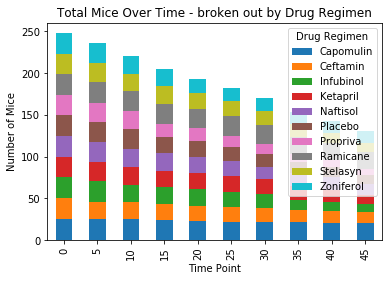

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#number of mice in each regimen utilizing (pd)
# bar_chart_data = pd.DataFrame({"Total Mice" : df_master.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count()})
# bar_chart_data

#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
bar_df = df_master.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count().unstack("Drug Regimen").fillna(0)
plt.figure(figsize=(20,10))
bar_df.plot(kind='bar', stacked=True)

plt.title("Total Mice Over Time - broken out by Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Time Point")


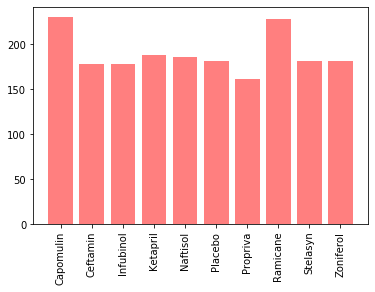

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
pyplot_bar_data = pd.DataFrame({"total count" : df_master.groupby("Drug Regimen")["Mouse ID"].count()}).reset_index()
x_axis = np.arange(len(pyplot_bar_data))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, pyplot_bar_data["total count"], color='r', alpha=0.5, align="center")
x_tick = plt.xticks(tick_locations, pyplot_bar_data["Drug Regimen"], rotation="vertical")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
